## Assignment to Complete for Data Scientist Role - Teqfocus Solutions Pvt. Ltd.

You have been provided a historical dataset pertaining to passengers flying from London Heathrow Airport, UK until the Newark Airport, USA during the last 3years.

There are a total of 887 passengers with their survival indication, name, sex, age, and few more. You need to study the dataset and decide what is the best ML algorithm that can be used to on the dataset. Once you decide what ML algorithm to use, write a training model to predict the probability that a person survives given their passenger class and sex.

You have two days to work on this task, once completed please push it to your github repository as public, and share the github repo link with us for review. The dataset has been provided to you as an attachment herewith this email. We would prefer an .ipynb file being shared for review in order to go through your submitted assignment (Jupyter notebook).

# Assignment - London Heathrow Airport

In [137]:
# Libraries to perform the analysis 
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
import statsmodels.api as sm

import os 
# Import date class from datetime module
import  datetime 
# Returns the current local date
today = datetime.date.today()
print("Today date is: ", today)
# Hyperparameters adjustment to view the data frame 
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)

Today date is:  2022-05-13


In [8]:
#Set the dirctory 
os.chdir("E://Gyan//")
print (" Get Current Directory  " ,os.getcwd())
#os.listdir()

 Get Current Directory   E:\Gyan


In [9]:
# Read Data 
data =  pd.read_csv ("flightpassengers.csv")

In [10]:
#View the Data 
data.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [13]:
#View Table atributties 
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [14]:
#View Table Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [18]:
#Recheck for Nulls 
data.isnull().sum()
# No Nulls 

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [20]:
# Do the descriptivive Statistics  
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [25]:
# Peform EDA on respective fields 
data.groupby(['Survived']).size()

Survived
0    545
1    342
dtype: int64

### The dependent Variable "Survived" is binary 0,1 hence most likely ML algirithem used will be Logistic regression 

In [28]:
data.groupby(['Sex']).size()

Sex
female    314
male      573
dtype: int64

#### Convert the Sex into Binary Field 

In [36]:
LE = LabelEncoder()
data['Sex_Int'] = LE.fit_transform(data[['Sex']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [38]:
#Validate the conversion Rule 
data.groupby(['Sex', 'Sex_Int']).size()

Sex     Sex_Int
female  0          314
male    1          573
dtype: int64

#### Converted the categorical value of Sex into Binary 

In [39]:
data.groupby(['Pclass']).size()

Pclass
1    216
2    184
3    487
dtype: int64

#### There are 3 classes of the passangers 

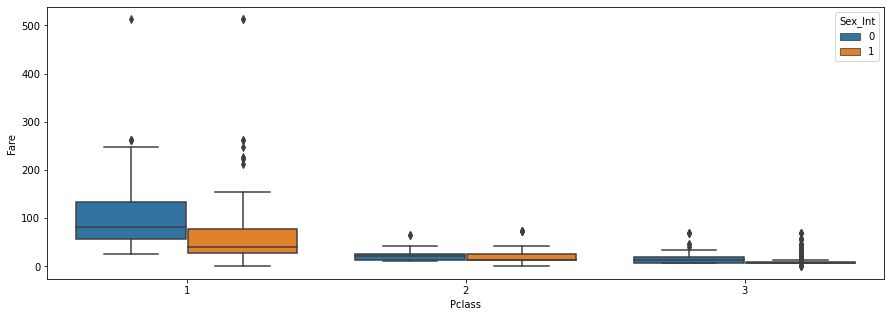

In [46]:
# Some Graphs 
plt.figure(figsize=(15,5));
sns.boxplot(hue = 'Sex_Int',  x= 'Pclass' , y = 'Fare', data= data) 
plt.show()

It seems pclass = 1 are most tickets bought and with fare being relatively high,  we can see some extreem outlairs,  but since Fare won't be used in model hence no treatment

In [52]:
#Chech Dependent var and independent var 
data.groupby(['Sex','Pclass','Survived']).agg({"Survived": [ np.size]})

Survived
                           size
Sex    Pclass Survived         
female 1      0               3
              1              91
       2      0               6
              1              70
       3      0              72
              1              72
male   1      0              77
              1              45
       2      0              91
              1              17
       3      0             296
              1              47

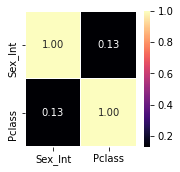

In [107]:
# Get Corelations matirix 
fig,ax = plt.subplots(figsize=(2.5,2.5))
sns.heatmap(data[['Sex_Int','Pclass']].corr(),ax=ax,annot=True,linewidths=0.05,fmt='.2f',cmap="magma" )
plt.show()

Male have less rate to suvive, most casuality are from pclass = 3 



In [62]:
##Encoding Categorical Variables using pandas Dummies
data_2 =  pd.get_dummies(data, columns=['Pclass'] , drop_first= False )
data_2.columns



Index(['Survived', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare', 'Sex_Int', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

In [64]:
# Kick  Start  of modeling 
# Prepare vars for X and y 
X_vars =  ['Sex_Int', 'Pclass_1', 'Pclass_2','Pclass_3']
y_var = ['Survived']
print ("The Independent Variables \n " ,X_vars)
print ("\n The Dependent Variable \n " , y_var)

The Independent Variables 
  ['Sex_Int', 'Pclass_1', 'Pclass_2', 'Pclass_3']

 The Dependent Variable 
  ['Survived']


In [65]:
# Create Data Set from  Dependent Varaible Price 
X= data_2[X_vars]
Y= data_2[y_var]

### Sampling Dependent Varaible Nulls are droped and model is trained
1.Train 70% and Test 30%

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = .3, random_state = 0 ) 
print ("Train Set Dimension ", X_train.shape ,  Y_train.shape , "\nTest  Set Dimension " , X_test.shape , Y_test.shape )

Train Set Dimension  (620, 4) (620, 1) 
Test  Set Dimension  (267, 4) (267, 1)


# Model 1 

In [76]:
## Training & Testing the model 
model = LogisticRegression(random_state=0).fit(X_train, Y_train)
train_accuracy  = model.score(X_train, Y_train)*100
test_accuracy  = model.score(X_test, Y_test)*100
print (" Train Data Accuracy  >>  ", train_accuracy  , '  Vs Test Data Accuracy >> ' , test_accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


 Train Data Accuracy  >>   79.19354838709678   Vs Test Data Accuracy >>  77.15355805243446


In [122]:
#Precdict the results 
Y_pred_train =  model.predict(X_train)
Y_pred_test =  model.predict(X_test)

The confusion matrix of 
 [[329  54]
 [ 75 162]]
 the accuracy_train  79.19354838709678
              precision    recall  f1-score   support

NOT Survived       0.81      0.86      0.84       383
    Survived       0.75      0.68      0.72       237

    accuracy                           0.79       620
   macro avg       0.78      0.77      0.78       620
weighted avg       0.79      0.79      0.79       620



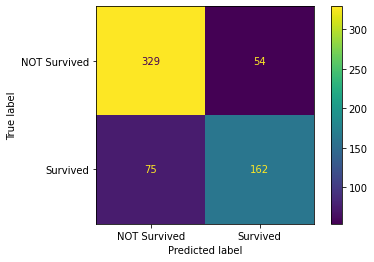

In [123]:
# Train Data  all stats 
print ('The confusion matrix of \n',confusion_matrix(Y_train, Y_pred_train))
plot_confusion_matrix ( model, X_train,Y_train,display_labels= ["NOT Survived","Survived"])
print (' the accuracy_train ' ,  model.score(X_train,Y_train) * 100.00) 
print(classification_report(Y_train, Y_pred_train, target_names  =  ["NOT Survived","Survived"]))

The confusion matrix of 
 [[135  27]
 [ 34  71]]
 the accuracy  TEST DATA   77.15355805243446
              precision    recall  f1-score   support

NOT Survived       0.80      0.83      0.82       162
    Survived       0.72      0.68      0.70       105

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.76       267
weighted avg       0.77      0.77      0.77       267



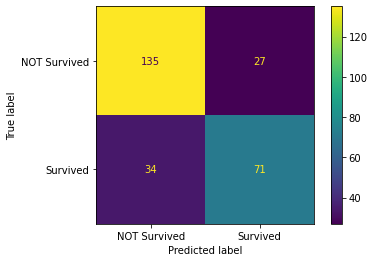

In [124]:
# Test Data  all stats 
print ('The confusion matrix of \n',confusion_matrix(Y_test, Y_pred_test))
plot_confusion_matrix(model, X_test,Y_test,display_labels= ["NOT Survived","Survived"])
print (' the accuracy  TEST DATA  ' ,  model.score(X_test, Y_test) * 100.00) 
print(classification_report(Y_test, Y_pred_test, target_names  =  ["NOT Survived","Survived"]))

## Print the model  

In [125]:
#Print model results 
print (" Train Model Results  \n" )
X = X_train
y = Y_train
X2 = sm.add_constant(X)
est = sm.Logit(y, X2)
est2 = est.fit()
print(est2.summary())

 Train Model Results  

Optimization terminated successfully.
         Current function value: 0.461649
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  620
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 May 2022   Pseudo R-squ.:                  0.3060
Time:                        19:14:19   Log-Likelihood:                -286.22
converged:                       True   LL-Null:                       -412.40
Covariance Type:            nonrobust   LLR p-value:                 2.029e-54
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0304   2.42e+06   4.26e-07      1.000   -4.74e+06    4.74e+06
Sex_I

## Model vars have very high  p Value hence dropping this model 

## Model 2 with Pclass as Vars 

In [121]:
#Print model results 
print (" Train Model Results  \n" )
X= data[['Sex_Int','Pclass']]
y= data[y_var]
X2 = sm.add_constant(X)
est = sm.Logit(y, X2)
est2 = est.fit()
print(est2.summary())

 Train Model Results  

Optimization terminated successfully.
         Current function value: 0.465826
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  887
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            2
Date:                Thu, 12 May 2022   Pseudo R-squ.:                  0.3013
Time:                        19:12:11   Log-Likelihood:                -413.19
converged:                       True   LL-Null:                       -591.38
Covariance Type:            nonrobust   LLR p-value:                 4.073e-78
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2838      0.297     11.045      0.000       2.701       3.867
Sex_I

### Predict Final results into Data frame for 

In [127]:
# the data set 
X= data[['Sex_Int','Pclass']]
Y= data_2[y_var]

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = .3, random_state = 0 ) 
print ("Train Set Dimension ", X_train.shape ,  Y_train.shape , "\nTest  Set Dimension " , X_test.shape , Y_test.shape )


Train Set Dimension  (620, 2) (620, 1) 
Test  Set Dimension  (267, 2) (267, 1)


In [128]:
## Training & Testing the model 
model = LogisticRegression(random_state=0).fit(X_train, Y_train)
train_accuracy  = model.score(X_train, Y_train)*100
test_accuracy  = model.score(X_test, Y_test)*100
print (" Train Data Accuracy  >>  ", train_accuracy  , '  Vs Test Data Accuracy >> ' , test_accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


 Train Data Accuracy  >>   79.19354838709678   Vs Test Data Accuracy >>  77.15355805243446


In [129]:
#Precdict the results 
Y_pred_train =  model.predict(X_train)
Y_pred_test =  model.predict(X_test)

The confusion matrix of 
 [[329  54]
 [ 75 162]]
 the accuracy_train  79.19354838709678
              precision    recall  f1-score   support

NOT Survived       0.81      0.86      0.84       383
    Survived       0.75      0.68      0.72       237

    accuracy                           0.79       620
   macro avg       0.78      0.77      0.78       620
weighted avg       0.79      0.79      0.79       620



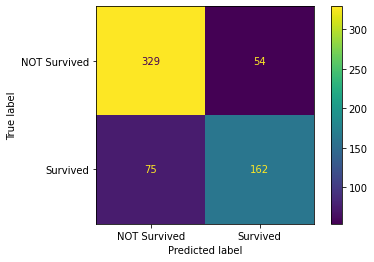

In [130]:
# Train Data  all stats 
print ('The confusion matrix of \n',confusion_matrix(Y_train, Y_pred_train))
plot_confusion_matrix ( model, X_train,Y_train,display_labels= ["NOT Survived","Survived"])
print (' the accuracy_train ' ,  model.score(X_train,Y_train) * 100.00) 
print(classification_report(Y_train, Y_pred_train, target_names  =  ["NOT Survived","Survived"]))

The confusion matrix of 
 [[135  27]
 [ 34  71]]
 the accuracy  TEST DATA   77.15355805243446
              precision    recall  f1-score   support

NOT Survived       0.80      0.83      0.82       162
    Survived       0.72      0.68      0.70       105

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.76       267
weighted avg       0.77      0.77      0.77       267



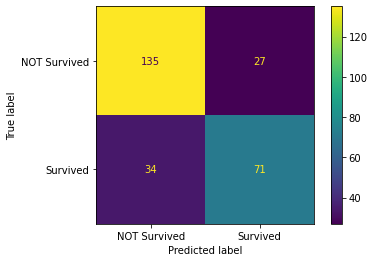

In [131]:
# Test Data  all stats 
print ('The confusion matrix of \n',confusion_matrix(Y_test, Y_pred_test))
plot_confusion_matrix(model, X_test,Y_test,display_labels= ["NOT Survived","Survived"])
print (' the accuracy  TEST DATA  ' ,  model.score(X_test, Y_test) * 100.00) 
print(classification_report(Y_test, Y_pred_test, target_names  =  ["NOT Survived","Survived"]))

## Final Model Predictions 

In [135]:
predict_Survived  =  model.predict(data[['Sex_Int','Pclass']])
data['predict_Survived']=pd.DataFrame({'predict_Survived' : predict_Survived})
#data_predict_values_cat

In [136]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_Int,predict_Survived
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0
